In [1]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess  

In [2]:
dataset = pd.read_csv('/Users/test/Desktop/news_cato/dataset/trainset/combined_csv.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})
ds = pd.read_csv('/Users/test/Desktop/news_cato/dataset/livemint_data_2023.csv')[['headline', 'sector_name']].rename(columns = {'sector_name': 'category'})

In [3]:
dataset

,headline,category
0,Numerology Reading 19 May 2021,"OTT, Gaming & Digital Content"
1,Hyundai Venue N Line Launch Date: 2022 Hyundai...,Auto & Ancillary
2,2022 Hyundai Venue Vs Nexon Vs XUV300 Vs Magni...,Auto & Ancillary
3,2022 Kia Sportage SUV breaks cover with safety...,Auto & Ancillary
4,"2022 Kia Telluride gets safety, comfort updates",Auto & Ancillary
...,...,...
68265,"Meta acquires 3D smart glass maker Luxexcel, T...",Communications
68266,Vodafone Idea rolls out new data add-on plans ...,Communications
68267,Google to pay Indiana $20 million to resolve p...,Communications
68268,India may review stance on Chinese investments...,Communications


In [4]:
ds.tail(50)

,headline,category
12420,Three-fourths of Indian villages achieve Open ...,Health & Wellness
12421,India achieved 2 milestones with iPhone 15 lau...,Fashion & Lifestyle
12422,"Jupiter appoints Anuj Rathi as chief product, ...",E-Commerce & IT
12423,Itc share price Today Live Updates : ITC share...,FMCG
12424,Why facial masks and serums are essential in s...,Health & Wellness
12425,Day trading guide for today: Six stocks to buy...,FMCG
12426,Vodafone Idea share price Today Live Updates :...,Communications
12427,Tech Mahindra share price Today Live Updates :...,Auto & Ancillary
12428,Former SBI Chairman Rajnish Kumars remuneratio...,Auto & Ancillary
12429,Bharti Airtel share price Today Live Updates :...,Communications


In [5]:
ds.head(20)

,headline,category
0,"Itc closed today at Rs420.45, up 0.02% from ye...",FMCG
1,Heres how you can enjoy a 5-star hotel stay fo...,FMCG
2,"Itc closed today at Rs420.35, down -1.19% from...",FMCG
3,"Credit Suisse surges 40% on lifeline, fuelling...",Internet based service
4,Credit Suisse survived two world wars. It can ...,Internet based service
5,"Bitcoin floats near $25k, but embattling Credi...",Internet based service
6,Markets halt 5-day losing streak after Credit ...,Internet based service
7,Toyota Motor declines report of discounts on H...,Fashion & Lifestyle
8,From Swiss bank loan to debt securities offers...,Internet based service
9,Obesity: 10 Lifestyle Changes to Manage Obesity,Fashion & Lifestyle


In [6]:
dataset.tail(20)

,headline,category
68250,Post Graduate Institute Of Medical Education A...,Health & Wellness
68251,Research: Genetic clues link lipoprotein A to ...,Health & Wellness
68252,Pinarayi Vijayan: Kerala CM asks people to be ...,Health & Wellness
68253,Covid variant XBB.1.5 account for over 40pc of...,Health & Wellness
68254,"HC to decide on fetal reduction at 25 weeks, H...",Health & Wellness
68255,"Soon, government to set standards for drowsine...",Health & Wellness
68256,Hershey sued in US over metal in dark chocolat...,Retail
68257,Deep discounts on budget phones as firms look ...,Retail
68258,Centres fiscal deficit touches 59% of full-yea...,Retail
68259,India to push for gig economys social protecti...,Retail


In [7]:
dataset['category'].unique()

array(['OTT, Gaming & Digital Content', 'Auto & Ancillary', 'FMCG',
       'E-health', 'Internet based service', 'Retail',
       'Consumer Electronics', 'Ed-Tech', 'Liquor & Tobacco',
       'Fashion & Lifestyle', 'Handsets', 'E-Commerce & IT',
       'Construction & Real Estate', 'BFSI', 'Health & Wellness',
       'Communications', 'Media & Entertainment'], dtype=object)

In [8]:
ds['category'].unique()

array(['FMCG', 'Internet based service', 'Fashion & Lifestyle',
       'Communications', 'BFSI', 'Handsets', 'Retail',
       'Health & Wellness', 'Ed-Tech', 'Auto & Ancillary', 'E-health',
       'Consumer Electronics', 'E-Commerce & IT',
       'OTT, Gaming & Digital Content', 'Media & Entertainment',
       'Liquor & Tobacco', 'Construction & Real Estate'], dtype=object)

In [9]:
dataset.isnull().sum()

headline    84
category     0
dtype: int64

In [10]:
ds.isnull().sum()

headline    8
category    0
dtype: int64

In [11]:
ds.dropna(inplace = True)

In [12]:
dataset.dropna(inplace = True)

In [13]:
dataset.category.value_counts()

FMCG                             12892
Health & Wellness                 8743
Auto & Ancillary                  6447
E-Commerce & IT                   6348
Handsets                          5570
BFSI                              5330
Communications                    5042
OTT, Gaming & Digital Content     3840
Retail                            2862
Construction & Real Estate        2025
Fashion & Lifestyle               1709
Liquor & Tobacco                  1500
Internet based service            1459
Consumer Electronics              1197
Ed-Tech                           1150
E-health                          1075
Media & Entertainment              997
Name: category, dtype: int64

In [14]:
dataset.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
dataset.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
dataset.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
dataset.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
dataset.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
dataset.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
dataset.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
dataset.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
dataset.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
dataset.category.replace("Internet based service", "Internet_based_service", inplace=True)

dataset.category.unique()

array(['OTT,_Gaming_&_Digital_Content', 'Auto_&_Ancillary', 'FMCG',
       'E-health', 'Internet_based_service', 'Retail',
       'Consumer_Electronics', 'Ed-Tech', 'Liquor_&_Tobacco',
       'Fashion_&_Lifestyle', 'Handsets', 'E-Commerce_&_IT',
       'Construction_&_Real_Estate', 'BFSI', 'Health_&_Wellness',
       'Communications', 'Media_&_Entertainment'], dtype=object)

In [15]:
dataset.category.value_counts()

FMCG                             12892
Health_&_Wellness                 8743
Auto_&_Ancillary                  6447
E-Commerce_&_IT                   6348
Handsets                          5570
BFSI                              5330
Communications                    5042
OTT,_Gaming_&_Digital_Content     3840
Retail                            2862
Construction_&_Real_Estate        2025
Fashion_&_Lifestyle               1709
Liquor_&_Tobacco                  1500
Internet_based_service            1459
Consumer_Electronics              1197
Ed-Tech                           1150
E-health                          1075
Media_&_Entertainment              997
Name: category, dtype: int64

In [16]:
ds.category.value_counts()

FMCG                             2192
Health & Wellness                2030
Auto & Ancillary                 1557
Handsets                         1434
Communications                   1323
Internet based service            720
Fashion & Lifestyle               702
E-Commerce & IT                   669
Retail                            666
BFSI                              519
Ed-Tech                           261
OTT, Gaming & Digital Content     162
Liquor & Tobacco                  147
Media & Entertainment              31
Consumer Electronics               26
Construction & Real Estate         13
E-health                           10
Name: category, dtype: int64

In [17]:
ds.category.replace("Health & Wellness", "Health_&_Wellness", inplace=True)
ds.category.replace("Auto & Ancillary", "Auto_&_Ancillary", inplace=True)
ds.category.replace("E-Commerce & IT", "E-Commerce_&_IT", inplace=True)
ds.category.replace("OTT, Gaming & Digital Content", "OTT,_Gaming_&_Digital_Content", inplace=True)
ds.category.replace("Fashion & Lifestyle", "Fashion_&_Lifestyle", inplace=True)
ds.category.replace("Construction & Real Estate", "Construction_&_Real_Estate", inplace=True)
ds.category.replace("Media & Entertainment", "Media_&_Entertainment", inplace=True)
ds.category.replace("Liquor & Tobacco", "Liquor_&_Tobacco", inplace=True)
ds.category.replace("Consumer Electronics", "Consumer_Electronics", inplace=True)
ds.category.replace("Internet based service", "Internet_based_service", inplace=True)


ds.category.unique()

array(['FMCG', 'Internet_based_service', 'Fashion_&_Lifestyle',
       'Communications', 'BFSI', 'Handsets', 'Retail',
       'Health_&_Wellness', 'Ed-Tech', 'Auto_&_Ancillary', 'E-health',
       'Consumer_Electronics', 'E-Commerce_&_IT',
       'OTT,_Gaming_&_Digital_Content', 'Media_&_Entertainment',
       'Liquor_&_Tobacco', 'Construction_&_Real_Estate'], dtype=object)

In [18]:
ds.category.value_counts()

FMCG                             2192
Health_&_Wellness                2030
Auto_&_Ancillary                 1557
Handsets                         1434
Communications                   1323
Internet_based_service            720
Fashion_&_Lifestyle               702
E-Commerce_&_IT                   669
Retail                            666
BFSI                              519
Ed-Tech                           261
OTT,_Gaming_&_Digital_Content     162
Liquor_&_Tobacco                  147
Media_&_Entertainment              31
Consumer_Electronics               26
Construction_&_Real_Estate         13
E-health                           10
Name: category, dtype: int64

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

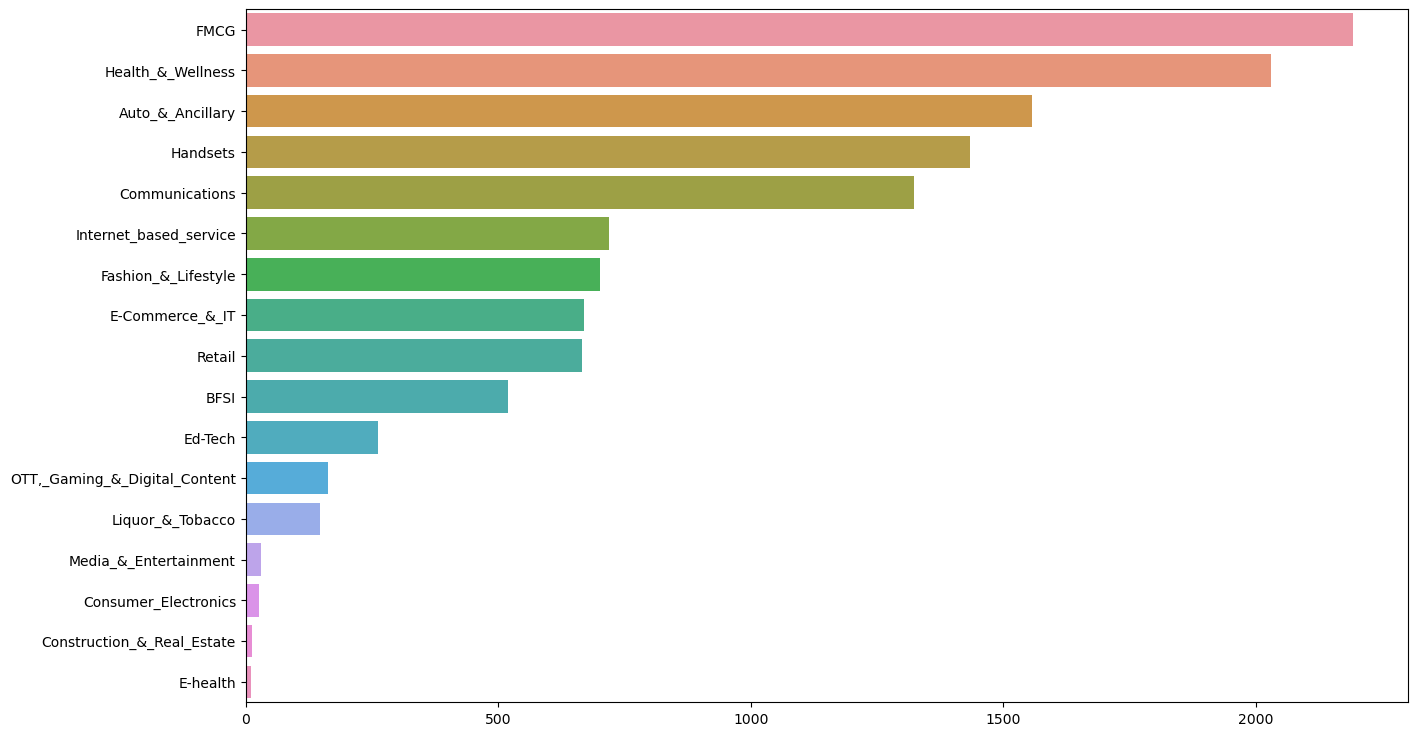

In [20]:
#training set
fig = plt.figure(figsize=(15,9))
sns.barplot(x = ds['category'].value_counts().values,y=ds['category'].value_counts().index)

In [21]:
# NLP Preprocess
def preprocess_text(text):
    try:
       
        if isinstance(text, str):
            return ' '.join(simple_preprocess(text))
        else:
            return ''
    except Exception as e:
        print(f"Error processing  text: {e}")
        return ''

dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(preprocess_text)
ds.iloc[:, 0] = ds.iloc[:, 0].apply(preprocess_text)

In [22]:
dataset.iloc[:, 1] = dataset.iloc[:, 1].apply(lambda x: '__label__' + x)
ds.iloc[:, 1] = ds.iloc[:, 1].apply(lambda x: '__label__' + x)

In [23]:
dataset

,headline,category
0,numerology reading may,"__label__OTT,_Gaming_&_Digital_Content"
1,hyundai venue line launch date hyundai venue l...,__label__Auto_&_Ancillary
2,hyundai venue vs nexon vs xuv vs magnite vs ki...,__label__Auto_&_Ancillary
3,kia sportage suv breaks cover with safety updates,__label__Auto_&_Ancillary
4,kia telluride gets safety comfort updates,__label__Auto_&_Ancillary
...,...,...
68265,meta acquires smart glass maker luxexcel telec...,__label__Communications
68266,vodafone idea rolls out new data add on plans ...,__label__Communications
68267,google to pay indiana million to resolve priva...,__label__Communications
68268,india may review stance on chinese investments...,__label__Communications


In [24]:
ds.head(5), dataset.head(4), ds.tail(10)

(                                            headline  \
 0       itc closed today at rs up from yesterdays rs   
 1   heres how you can enjoy star hotel stay for free   
 2     itc closed today at rs down from yesterdays rs   
 3     credit suisse surges on lifeline fuelling bank   
 4  credit suisse survived two world wars it can p...   
 
                           category  
 0                    __label__FMCG  
 1                    __label__FMCG  
 2                    __label__FMCG  
 3  __label__Internet_based_service  
 4  __label__Internet_based_service  ,
                                             headline  \
 0                             numerology reading may   
 1  hyundai venue line launch date hyundai venue l...   
 2  hyundai venue vs nexon vs xuv vs magnite vs ki...   
 3  kia sportage suv breaks cover with safety updates   
 
                                  category  
 0  __label__OTT,_Gaming_&_Digital_Content  
 1               __label__Auto_&_Ancillary  
 2   

In [25]:
import csv 

In [26]:
# Saving the CSV file as a text file to train/test the classifier
dataset[['category', 'headline']].to_csv('train1.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " "
                                        )

ds[['category', 'headline']].to_csv('test1.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " "
                                   )


In [27]:
import fasttext

In [28]:
model = fasttext.train_supervised('train1.txt', wordNgrams = 3, epoch = 400, lr = 0.8)

Read 0M words
Number of words:  32941
Number of labels: 17
Progress: 100.0% words/sec/thread:  655907 lr:  0.000000 avg.loss:  0.050339 ETA:   0h 0m 0s 20.9% words/sec/thread:  650287 lr:  0.632419 avg.loss:  0.105660 ETA:   0h 2m35s 33.9% words/sec/thread:  649341 lr:  0.529063 avg.loss:  0.085182 ETA:   0h 2m 9s 39.2% words/sec/thread:  657921 lr:  0.486326 avg.loss:  0.079427 ETA:   0h 1m57s 54.4% words/sec/thread:  658695 lr:  0.364552 avg.loss:  0.067715 ETA:   0h 1m28s 57.4% words/sec/thread:  654231 lr:  0.341099 avg.loss:  0.066007 ETA:   0h 1m23s 88.3% words/sec/thread:  655292 lr:  0.093750 avg.loss:  0.053667 ETA:   0h 0m22s 91.6% words/sec/thread:  657146 lr:  0.067419 avg.loss:  0.052711 ETA:   0h 0m16s 96.1% words/sec/thread:  656451 lr:  0.031180 avg.loss:  0.051415 ETA:   0h 0m 7s


In [29]:
model.save_model("model_news.bin")

In [30]:
model.test('test1.txt') 

(12462, 0.5597817364788958, 0.5597817364788958)

In [31]:
result = model.test('test1.txt')

precision = result[1]  # Precision
recall = result[2]     # Recall
accuracy = (precision + recall) / 2 

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


In [32]:
model.predict(ds.iloc[14, 0])

(('__label__Fashion_&_Lifestyle',), array([0.96522629]))

In [33]:
 ds['category'].unique()

array(['__label__FMCG', '__label__Internet_based_service',
       '__label__Fashion_&_Lifestyle', '__label__Communications',
       '__label__BFSI', '__label__Handsets', '__label__Retail',
       '__label__Health_&_Wellness', '__label__Ed-Tech',
       '__label__Auto_&_Ancillary', '__label__E-health',
       '__label__Consumer_Electronics', '__label__E-Commerce_&_IT',
       '__label__OTT,_Gaming_&_Digital_Content',
       '__label__Media_&_Entertainment', '__label__Liquor_&_Tobacco',
       '__label__Construction_&_Real_Estate'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

                               precision    recall  f1-score   support

                         BFSI       0.54      0.64      0.59       519
   Construction_&_Real_Estate       0.04      0.31      0.07        13
       Internet_based_service       0.73      0.38      0.50       720
                       Retail       0.72      0.45      0.56       666
            Health_&_Wellness       0.81      0.47      0.60      2030
        Media_&_Entertainment       0.21      0.29      0.25        31
OTT,_Gaming_&_Digital_Content       0.29      0.60      0.39       162
              E-Commerce_&_IT       0.53      0.54      0.54       669
                     Handsets       0.50      0.44      0.47      1434
                         FMCG       0.37      0.74      0.49      2192
                      Ed-Tech       0.77      0.29      0.42       261
               Communications       0.85      0.60      0.71      1323
             Liquor_&_Tobacco       0.83      0.65      0.73       147
     

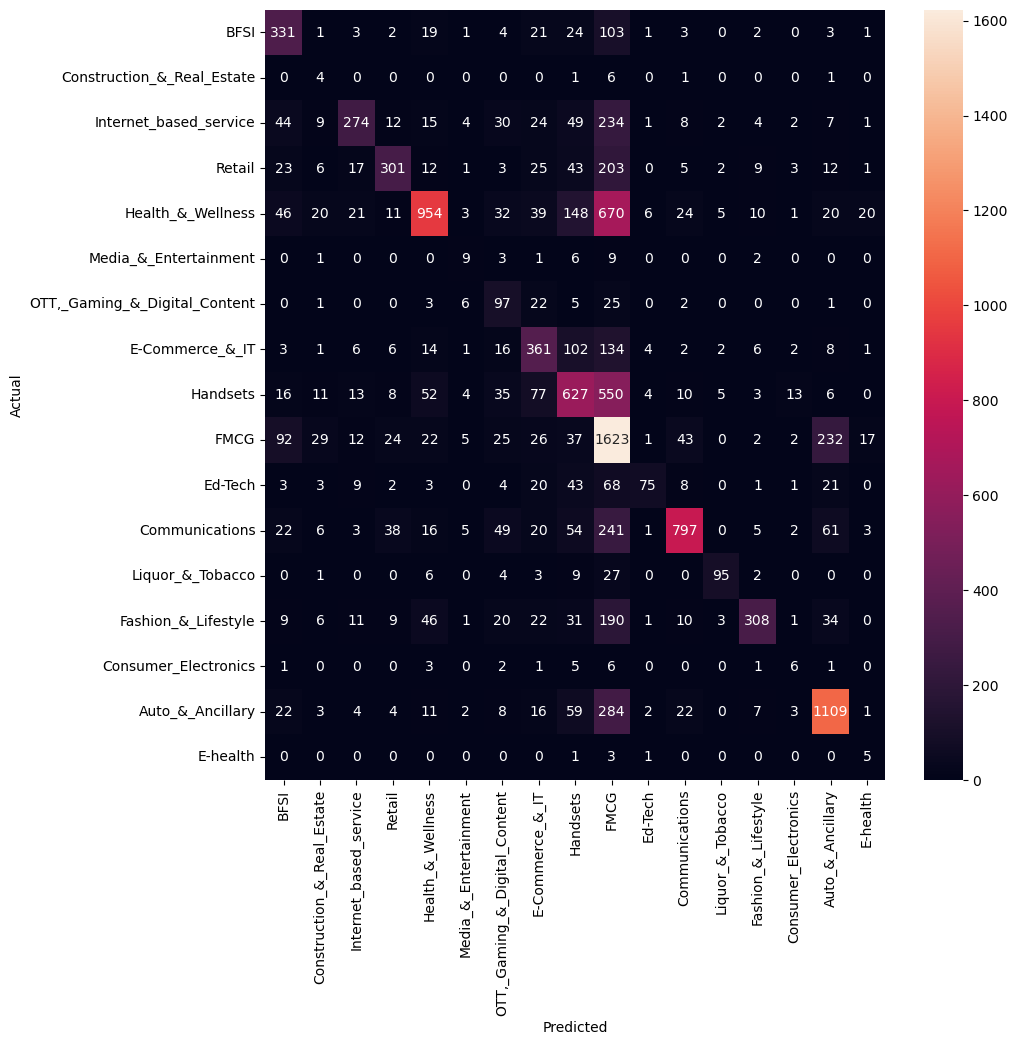

Accuracy: 0.5597817364788958


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

predictions = model.predict(list(ds['headline']))

true_labels = ds['category'].str.replace('__label__', '', regex=False).to_list()

predicted_labels = [label[0].replace('__label__', '') for label in predictions[0]]


your_category_names = list(set(true_labels))

class_mapping = {label: idx for idx, label in enumerate(your_category_names)}

true_labels_indices = [class_mapping[label] for label in true_labels]
predicted_labels_indices = [class_mapping[label] for label in predicted_labels]

report = classification_report(true_labels_indices, predicted_labels_indices, target_names=your_category_names)
print(report)

conf_mat = confusion_matrix(true_labels_indices, predicted_labels_indices)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=your_category_names, yticklabels=your_category_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

result2 = accuracy_score(true_labels_indices, predicted_labels_indices)
print("Accuracy:", result2)
